<a href="https://colab.research.google.com/github/Dyfox100/CUDA-Tutorials/blob/main/Matrix_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix Operations in CUDA

### But first, set up the environment

In [7]:
!nvcc --version
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-fv3vrm95
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-fv3vrm95
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp36-none-any.whl size=4308 sha256=a09c3566607ddbeeaa1ee94d6da3d27c5fba0809a9e83c77c3b0d1820fec06b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-l9yfuknj/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin
created output directory at /content/src
Out bin /content/result.out


### Adding Two Vectors

In this next piece of code, we'll add two vectors. 

Each thread works on a small portion of the total number of elements to add.

This uses a 1 dimensional grid, 1 dimensional blocks, and a grid stride loop. 

Grid stride means that each thread operates on one element then adds the total number of threads in the grid to get the index of the next element. 

We'll max out the number of threads we can use on a tesla k80 (colab normally runs on those gpus).

From [here](https://www.nvidia.com/en-gb/data-center/tesla-k80/), there are 4992 CUDA cores on a K80.


In [ ]:
%%cu
#include <stdio.h>
#include <stdlib.h>

__global__ void add(int size, float *x, float *y) {
    int index = blockIdx.x * blockDim.x + threadIdx.x;
    int stride = blockDim.x * gridDim.x;

    for (int i = index; i < size; i += stride) {
        y[i] = x[i] + y[i];
    }
}


int main() {
    int size = 1000000000;
    float *x, *y;

    // Allocate space for both the vectors on both the host and device.
    cudaMallocManaged(&x, size*sizeof(float));
    cudaMallocManaged(&y, size*sizeof(float));

    for (int i = 0; i < size; i++) {
        x[i] = 2.0f;
        y[i] = -1.0f;
    }

    // Launch kernel with 9 blocks with 512 threads in each block.
    // This is 4608 threads.
    add<<<9, 512>>>(size, x, y);

    cudaDeviceSynchronize();

    for(int i = 0; i < size; i++) {
        if (abs(y[i] - 1.0f) > 0.001f) {
            printf("Error is greater than 0.001! Value is: %f", y[i]);
        }
    }
    printf("Done! No errors detected!\n");
    printf("First value in y is: %f\n", y[0]);
    printf("Wow that was quick. We just added a billion floating point numbers!\n");
    cudaFree(x);
    cudaFree(y);
    return 0;
}


Done! No errors detected!
First value in y is: 1.000000
Wow that was quick. We just added a billion floating point numbers!



In [34]:
# # Install minimal prerequisites (Ubuntu 18.04 as reference)
# !sudo apt update && sudo apt install -y cmake g++ wget unzip
# # Download and unpack sources
# !wget -O opencv.zip https://github.com/opencv/opencv/archive/master.zip
# !unzip opencv.zip
# # Create build directory
# !mkdir -p build
# %cd build
# Configure
#!cmake  ../opencv-master
#!lscpu
# Build
!make -j4
!cp -a ../build/ ../drive/MyDrive/

[  2%] Built target libopenjp2
[  2%] Built target opencv_videoio_plugins
[  3%] Built target ade
[  3%] Built target ittnotify
[  5%] Built target ippiw
[  6%] Built target quirc
[  6%] Built target gen_opencv_python_source
[ 14%] Built target libwebp
[ 20%] Built target libprotobuf
[ 27%] Built target opencv_core
[ 27%] Built target opencv_flann
[ 27%] Built target opencv_version
[ 29%] Built target opencv_ml
[ 36%] Built target opencv_imgproc
[ 36%] Processing OpenCL kernels (features2d)
[ 36%] Building CXX object modules/photo/CMakeFiles/opencv_photo.dir/src/seamless_cloning_impl.cpp.o
[ 37%] Built target opencv_imgcodecs
Scanning dependencies of target opencv_features2d
[ 37%] Building CXX object modules/videoio/CMakeFiles/opencv_videoio.dir/src/videoio_registry.cpp.o
[ 37%] Building CXX object modules/dnn/CMakeFiles/opencv_dnn.dir/misc/tensorflow/versions.pb.cc.o
[ 37%] Building CXX object modules/features2d/CMakeFiles/opencv_features2d.dir/src/affine_feature.cpp.o
[ 37%] Buildin

In [51]:
!pwd
!cp -rvf -L build/ ./drive/MyDrive/build2

/content
'build/' -> './drive/MyDrive/build2'
'build/CMakeFiles' -> './drive/MyDrive/build2/CMakeFiles'
'build/CMakeFiles/dephelper' -> './drive/MyDrive/build2/CMakeFiles/dephelper'
'build/CMakeFiles/CMakeOutput.log' -> './drive/MyDrive/build2/CMakeFiles/CMakeOutput.log'
'build/CMakeFiles/3.12.0' -> './drive/MyDrive/build2/CMakeFiles/3.12.0'
'build/CMakeFiles/3.12.0/CompilerIdCXX' -> './drive/MyDrive/build2/CMakeFiles/3.12.0/CompilerIdCXX'
'build/CMakeFiles/3.12.0/CompilerIdCXX/tmp' -> './drive/MyDrive/build2/CMakeFiles/3.12.0/CompilerIdCXX/tmp'
'build/CMakeFiles/3.12.0/CompilerIdCXX/CMakeCXXCompilerId.cpp' -> './drive/MyDrive/build2/CMakeFiles/3.12.0/CompilerIdCXX/CMakeCXXCompilerId.cpp'
'build/CMakeFiles/3.12.0/CompilerIdCXX/a.out' -> './drive/MyDrive/build2/CMakeFiles/3.12.0/CompilerIdCXX/a.out'
'build/CMakeFiles/3.12.0/CMakeSystem.cmake' -> './drive/MyDrive/build2/CMakeFiles/3.12.0/CMakeSystem.cmake'
'build/CMakeFiles/3.12.0/CompilerIdC' -> './drive/MyDrive/build2/CMakeFiles/3.12.0

In [47]:
!g++ -I/usr/include/opencv -lopencv_core -lopencv_highgui -lopencv_imgproc ./drive/MyDrive/test.cpp

/tmp/cc0YChKv.o: In function `main':
test.cpp:(.text+0x48): undefined reference to `cv::imread(cv::String const&, int)'
test.cpp:(.text+0xab): undefined reference to `cv::imshow(cv::String const&, cv::_InputArray const&)'
test.cpp:(.text+0xd3): undefined reference to `cv::waitKey(int)'
/tmp/cc0YChKv.o: In function `cv::String::String(char const*)':
test.cpp:(.text._ZN2cv6StringC2EPKc[_ZN2cv6StringC5EPKc]+0x4d): undefined reference to `cv::String::allocate(unsigned long)'
/tmp/cc0YChKv.o: In function `cv::String::~String()':
test.cpp:(.text._ZN2cv6StringD2Ev[_ZN2cv6StringD5Ev]+0x14): undefined reference to `cv::String::deallocate()'
/tmp/cc0YChKv.o: In function `cv::Mat::~Mat()':
test.cpp:(.text._ZN2cv3MatD2Ev[_ZN2cv3MatD5Ev]+0x39): undefined reference to `cv::fastFree(void*)'
/tmp/cc0YChKv.o: In function `cv::Mat::release()':
test.cpp:(.text._ZN2cv3Mat7releaseEv[_ZN2cv3Mat7releaseEv]+0x4b): undefined reference to `cv::Mat::deallocate()'
collect2: error: ld returned 1 exit status


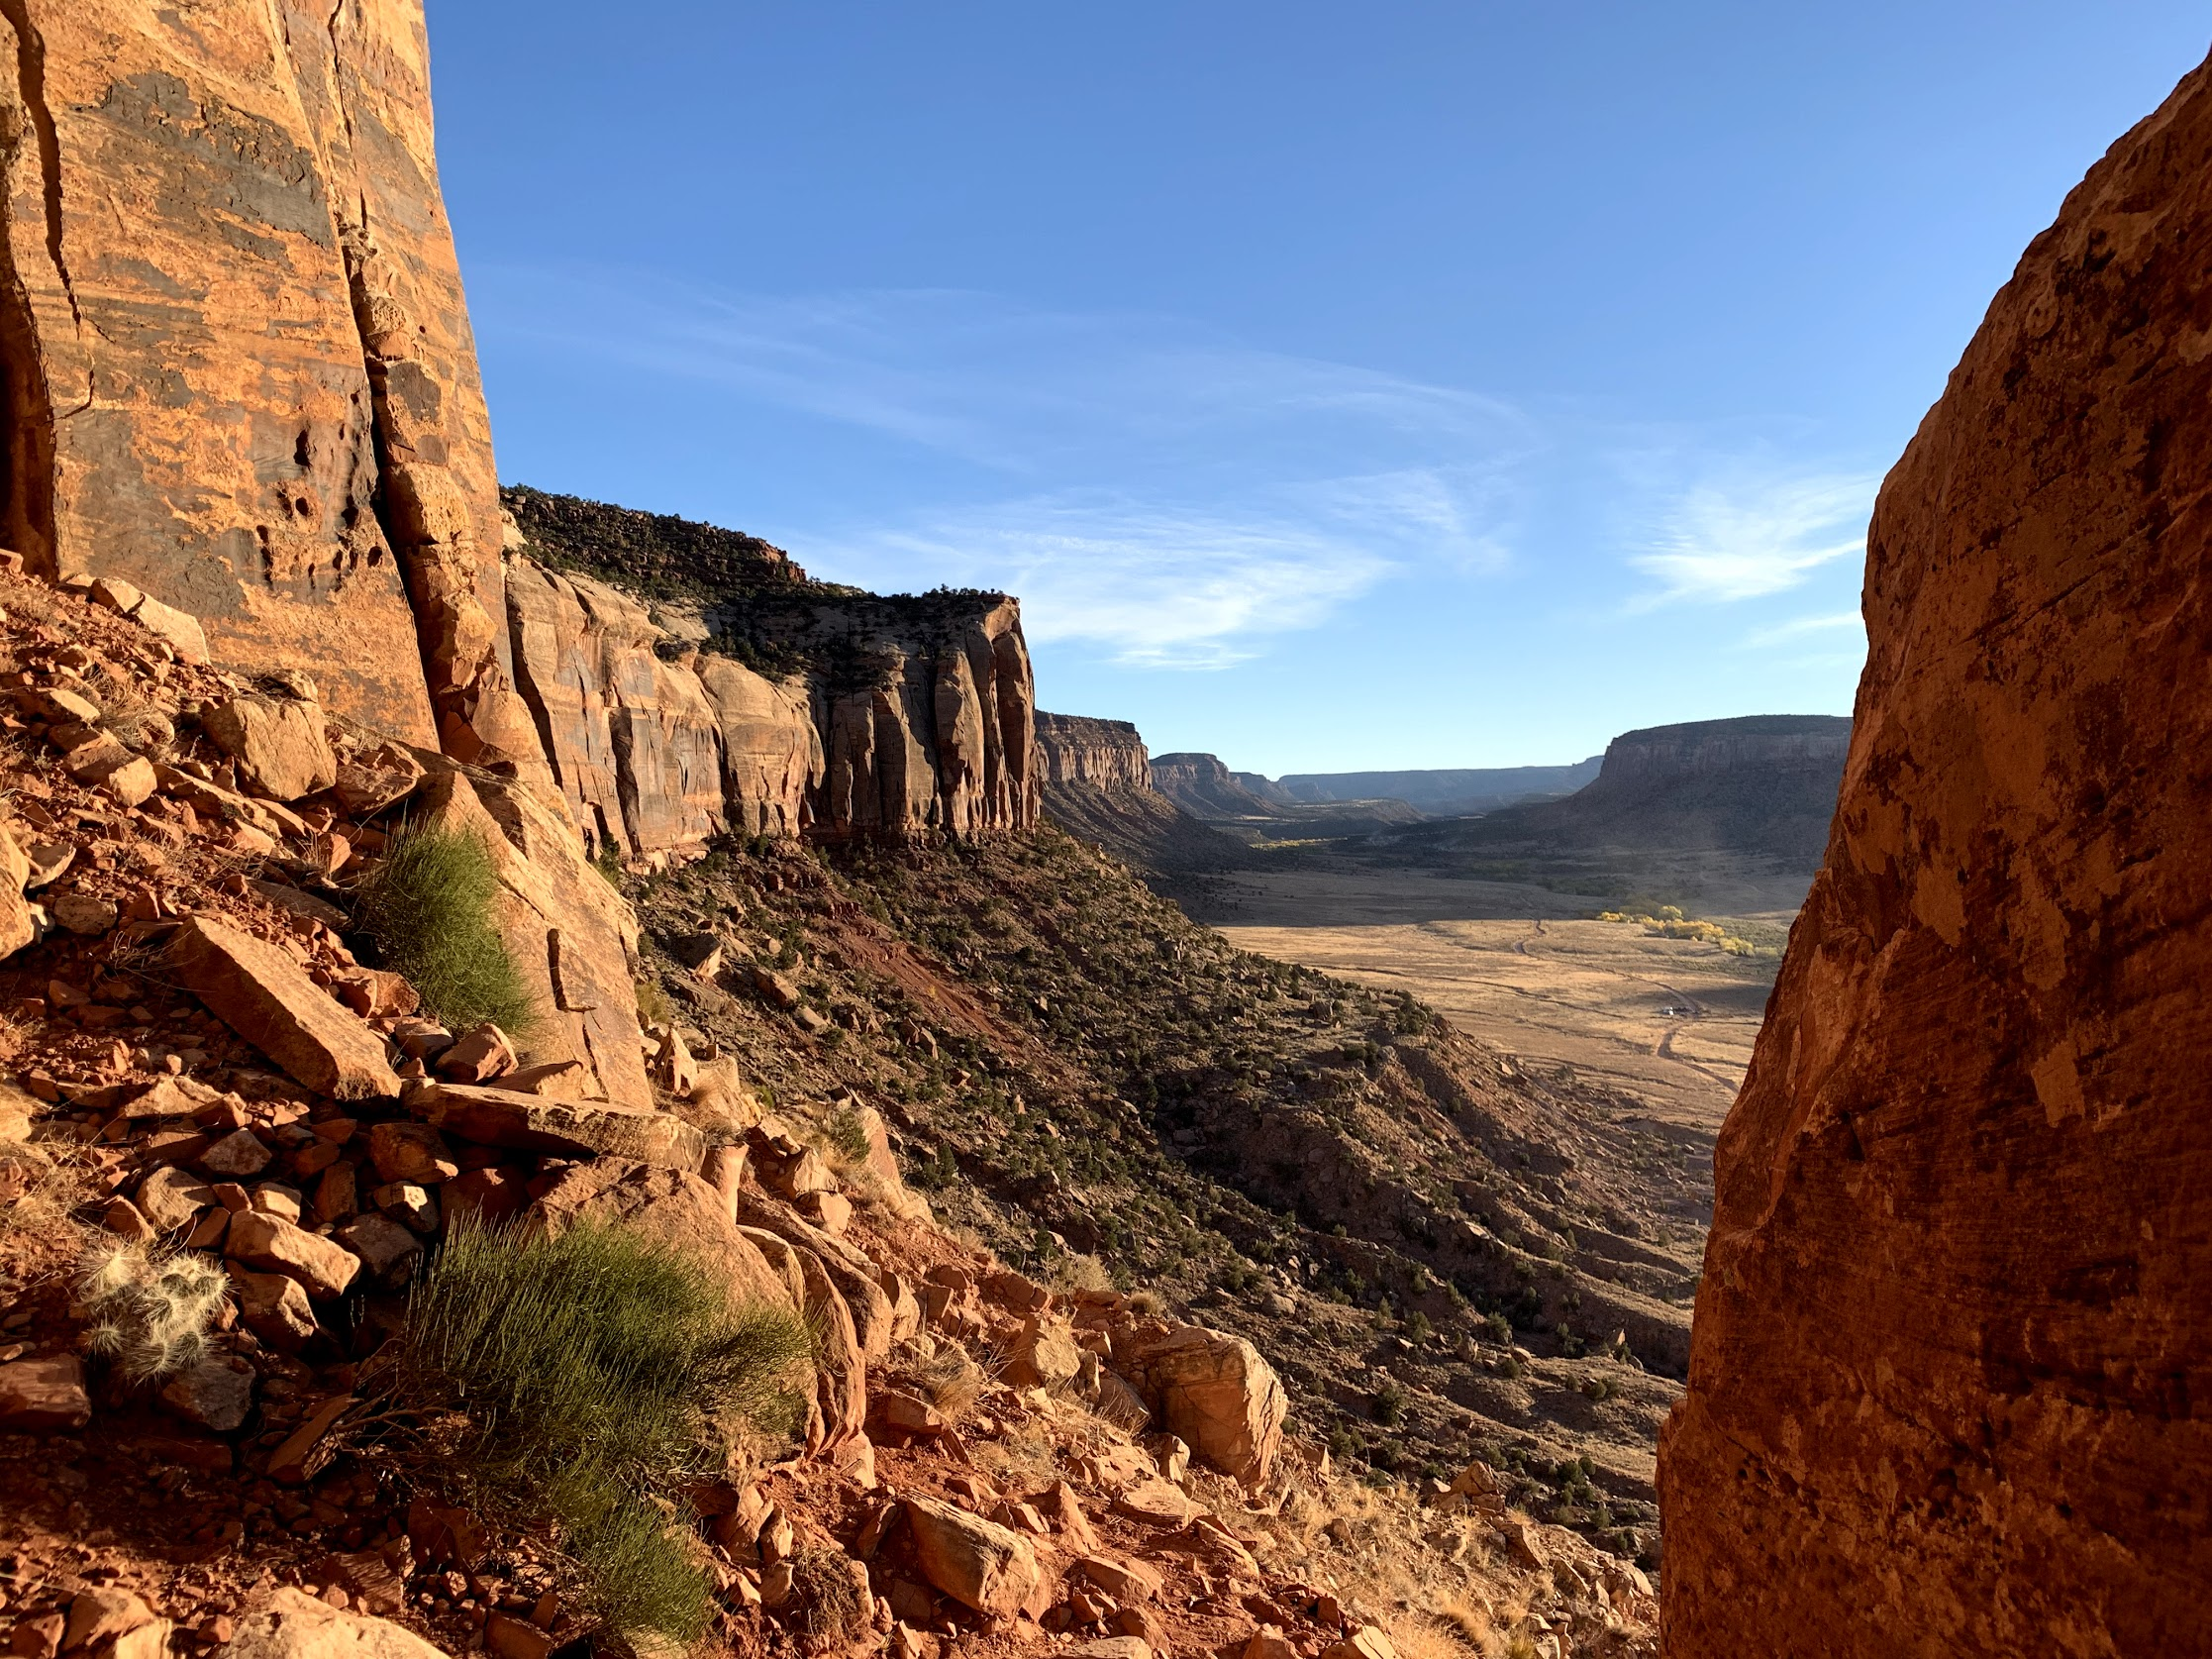

In [24]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("../IMG_0936.jpg")
cv2_imshow(img)
